In [21]:
import pandas as pd
import numpy as np
import graphviz
from sklearn import metrics
#import statsmodels.formula.api as smf

#Classification Algorithms 
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics as m
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn import tree
import pydotplus
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
data = pd.read_csv("bank_clean5.csv",header='infer') #將"y"的no定義為1,yes為2
data.head()

,housing,contact,month,duration,poutcome,y
0,yes,unknown,may,261,unknown,1
1,yes,unknown,may,151,unknown,1
2,yes,unknown,may,76,unknown,1
3,yes,unknown,may,92,unknown,1
4,no,unknown,may,198,unknown,1


In [23]:
data.dtypes#資料型態確認

housing     object
contact     object
month       object
duration     int64
poutcome    object
y            int64
dtype: object

In [24]:
print(np.isnan(data.any()))#確認有無缺失

housing     False
contact     False
month       False
duration    False
poutcome    False
y           False
dtype: bool


In [25]:
data_new = pd.get_dummies(data, columns=[
                                         'housing',
                                         'contact','month',
                                         'poutcome'])

In [26]:
data1 = data.copy()#轉換資料型態
data1['contact'] = data1['contact'].astype('category').cat.codes
data1['poutcome'] = data1['poutcome'].astype('category').cat.codes
data1['month'] = data1['month'].astype('category').cat.codes
data1['housing'] = data1['housing'].astype('category').cat.codes

In [27]:
data1.dtypes

housing      int8
contact      int8
month        int8
duration    int64
poutcome     int8
y           int64
dtype: object

In [28]:
print(data1.shape)

(45211, 6)


In [29]:
#分割測試集、訓練集
y = data1['y']
x=data1.drop(['y'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [30]:
print('Train data shape {} {}'.format(x_train.shape, y_train.shape))
print('Test data shape {} {}'.format(x_test.shape, y_test.shape))

Train data shape (36168, 5) (36168,)
Test data shape (9043, 5) (9043,)


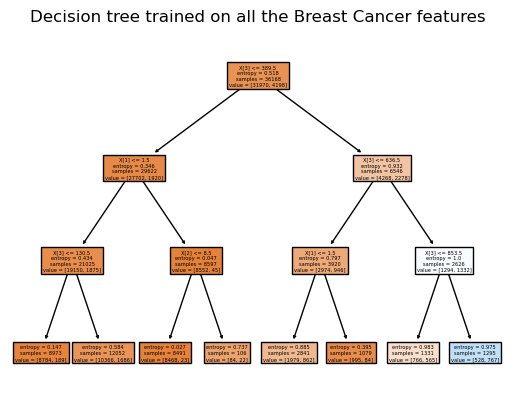

In [31]:
clf=DecisionTreeClassifier(criterion = 'entropy', max_depth=3)
clf=clf.fit(x_train,y_train)
clf.score(x_train,y_train)
predict=clf.predict(x_test)
clf.score(x_test,y_test)

plt.figure()
tree.plot_tree(clf, filled=True) #filled=True套色
plt.title("Decision tree trained on all the Breast Cancer features")
plt.show()


In [32]:
from sklearn.metrics import classification_report
print("決策樹分類績效表: ",classification_report(predict,y_test,digits=4))

決策樹分類績效表:                precision    recall  f1-score   support

           1     0.9808    0.8972    0.9371      8693
           2     0.1806    0.5629    0.2734       350

    accuracy                         0.8842      9043
   macro avg     0.5807    0.7300    0.6053      9043
weighted avg     0.9498    0.8842    0.9114      9043



In [33]:

path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

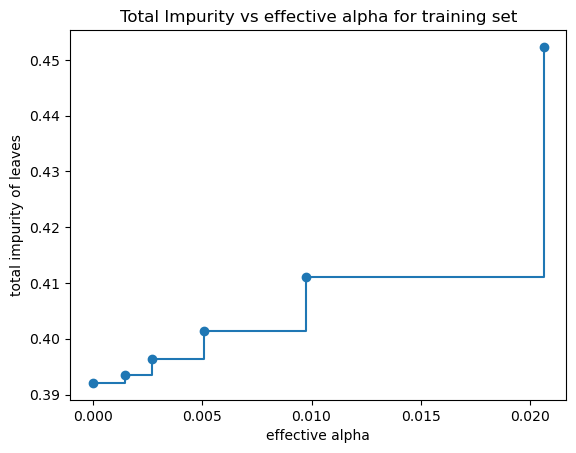

In [34]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [35]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, max_depth=3,ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.06562229637843997


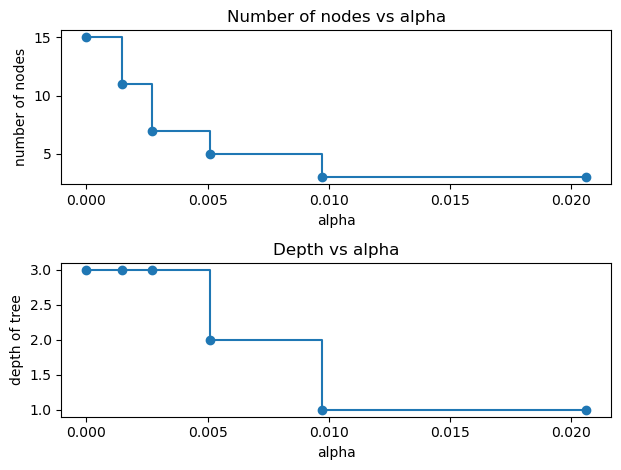

In [36]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

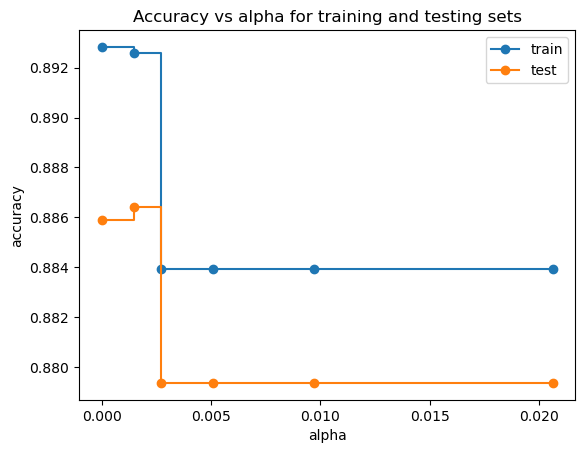

In [37]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

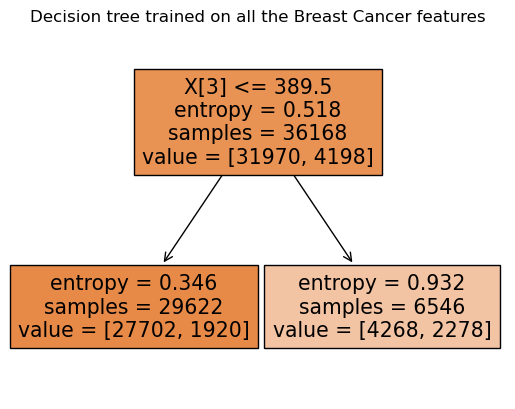

In [38]:
clf=DecisionTreeClassifier(criterion = 'entropy', max_depth=3,ccp_alpha=0.025) #修改ccp_alpha參數
clf = clf.fit(x_train,y_train)
clf.score(x_train,y_train)
predict2=clf.predict(x_test)
clf.score(x_test,y_test)



plt.figure()
tree.plot_tree(clf, filled=True) #filled=True套色
plt.title("Decision tree trained on all the Breast Cancer features")
plt.show()

In [39]:
from sklearn.metrics import classification_report
print("決策樹分類績效表: ",classification_report(predict2,y_test,digits=4))

決策樹分類績效表:                precision    recall  f1-score   support

           1     1.0000    0.8794    0.9358      9043
           2     0.0000    0.0000    0.0000         0

    accuracy                         0.8794      9043
   macro avg     0.5000    0.4397    0.4679      9043
weighted avg     1.0000    0.8794    0.9358      9043



C:\Users\BOB\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\BOB\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\BOB\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
df_outer = x_test.join(y_test, how='outer')
df_outer['predict'] = clf.predict(x_test)
df_outer['y'] = (df_outer['y'] == df_outer['predict'])
df_outer.to_csv("Bank.entropy.csv")